# Chapter 02_05. Cache & Persist

### 01. Transforms & Actions

##### 1. Transformations
- 결과값으로 새로운 RDD를 반환
- 지연 실행: Lazy Execution
    

##### 2. Actions
- 결과값을 연산하여 출력하거나 저장
- 즉시 실행: Eager Execution
    
### 02. 왜 두가지 연산으로 나뉘었을까?

##### 1. 지연되는 연산이 유용한 경우
- 메모리를 최대한 활용할 수 있다.
    - 지연시킴으로 디스크, 네트워크 연산을 최소화 할 수 있다.
    
- 데이터를 다루는 task는 반복되는 경우가 많다.
    - 예) 머신러닝
    
- 반복을 할 때 생기는 비효율
    - (task) -> (disk) -> (task) -> (disk)
    
- 어떤 데이터를 메모리에 남겨야 할지 알 경우 
    - (task) -> (task) 
    - Transformations는 지연 실행되기 때문에 메모리에 저장해 둘 수 있다.
    
### 03. Cache & Persist
- 데이터를 메모리에 남겨두고 싶을 때 사용할 수 있는 함수 
    - Cache() & Persist()
    - 두 함수를 통해 데이터를 메모리에 저장해두고 사용이 가능하다.
    


##### 코드 예시

categoryReviews = filtered_lines.map(parse)

result1 = categoryReviews.take(10)\
result2 = categoryReviews.mapValues(lambda x: (x,1)).collect()

이 때,\
categoryReviews는 result1과 result2를 만들면서 2번 만들어짐\
.persist()를 추가하여 메모리에 저장해두고 쓸 수있음

##### 예시 2: Regression

#####\
points = sc.textFile("...").map(parsePoint)

for i in range(ITERATIONS):
    gradient = points.map(gradient_sescent).reduce(lambda x,y : (x+y)) /n ) 
    w -= gradient * learning_rate \
#####


#####수정\
points = sc.textFile("...").map(parsePoint).cache()

for i in range(ITERATIONS):
    gradient = points.map(gradient_sescent).reduce(lambda x,y : (x+y)) /n ) 
    w -= gradient * learning_rate \
#####


### 04. Storage Level
|Storage Level|Meaning|
|:--:|:--|
|MEMORY_ONLY|Store RDD as deserialized Java objects in the JVM. If the RDD does not fit in memory, some partitions will no be cached and will be recomputered on the fly each time they're needed. This is the default level.|
|MEMORY_AND_DISK|Store RDD as deserialized Java objects in the JVM. If the RDD does not fit in memory, store the paritions that don't fit on disk, and read them from there when they're needed|
|MEMORY_ONLY_SER|Store RDD as serialized Java objects (one byte array per partitions). This is generally more space-efficient thant deserialized obejcts, especially when using a fast serialized, but more CPU-intensive to read|
|MEMORY_AND DISK_SER|Similar to MEMORY_ONLY_SER, but spill partitions that don't fit in memory to disk instead of recomputing them on the fly each time they're needed|
|DISK_ONLY|Store the RDD partitions only on disk|

##### Cache
- 디폴트 Storage Level 사용
- RDD: MEMORY_ONLY
- DF: MEMORY_AND_DISK

##### Persist
- Storage Level을 사용자가 원하는대로 지정가능

# Chapter 02_06. Cluster Topology

### 01. Master Worker Topology

##### Spark는 Master Worker Topology로 구성
스파크를 쓰면서 잊지 말아야 할 점
- 항상 데이터가 여러곳에 분산되어 있음
- 같은 연산이어도 여러 노드에 걸쳐서 실행됨

### 02. Spark 구조

In [8]:
from IPython.display import Image

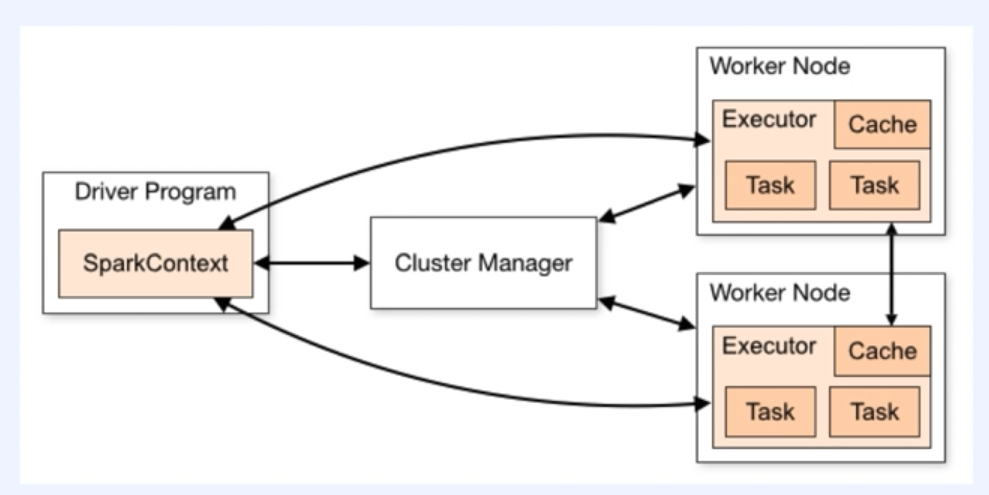

In [9]:
Image("./Spark의 구조.png")

Driver Program
- 개발자/사용자가 상호작용하는 곳

Worker Node
- 실제로 작업이 이루어지는 곳

Cluster Manaer
- 둘의 상호작용을 주관하는 곳

##### 예시 1)

RDD.foreach(lambda x: print(x)) 
- 워커 노드에서만 작동함으로 Driver Program에서는 확인할 수 없음

##### 예시 2)

foods = sc.parallelize(['짜장면','마라탕',...])\
three = foods.take(3)

이 때 three는 Driver Program에 나타난다

# Chapter 02_07. Reduction Operations

### 01. Reduction Operations
##### 01-1. Reduction
- 요소들을 모아서 하나로 합치는 작업
- 많은 Spark의 연산들이 reduction에 해당됨

### 02. 우리가 배운 것
- Transformations & Actions 
- 지연 실행으로 인한 성능 최적화
- Cache() & Persist()
- Cluster Topology

### 03. Transformations 
##### 03-1. Parallel Transformations 
- 주로 변형을 적용시키는 작업들
- map, flatmap, filter
Action은 어떻게 분산된 환경에서 작동할까?

### 04. Reduction이란?
##### 04-1. 대부분의 Action은 Reduction
Reduction: 근접하는 요소들을 모아서 하나의 결과로 만드는 일
- 파일 저장, collect()등과 같이 Reduction이 아닌 액션도 있다.

### 05. 병렬처리 하기 가능한 예
##### 05-1. Parallel Reduction 
- 병렬 처리가 가능한 경우
    - 두개의 요소들을 모아서 하나의 값으로 모으는 경우 각각이 독립적이어야함
- 병렬 처리가 힘든 경우(병렬처리 하는 의미가 없는 경우)
    - 순서대로가 아니고 

### 06. Reduction Actions
- Reduce
- Fold
- GroupBy
- Aggregate 
    
##### 06-1. Reduce
- ***RDD.reduce(fuction)***

In [6]:
from operator import add
from pyspark import SparkConf, SparkContext

import warnings 
warnings.simplefilter(action='ignore')

conf = SparkConf().setMaster('local').setAppName('category-review-average')
sc = SparkContext(conf=conf)
sc.parallelize([1,2,3,4,5]).reduce(add)

23/02/25 17:21:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


15

##### 06-2. Partition

In [8]:
sc.parallelize([1,2,3,4]).reduce(lambda x,y : (x*2)+y)

26

In [9]:
sc.parallelize([1,2,3,4],1).reduce(lambda x,y : (x*2)+y)

26

(1,2,3,4) -> ((1*2+2)*2+3)*2+4 = 26

In [15]:
sc.parallelize([1,2,3,4],2).reduce(lambda x,y : (x*2)+y)

18

(1,2),(3,4) -> ((1*2+2)*2 + (3*2)+4) = 18

In [20]:
sc.parallelize([1,2,3,4],3).reduce(lambda x,y : (x*2)+y)

18

In [21]:
sc.parallelize([1,2,3,4],4).reduce(lambda x,y : (x*2)+y)

26

##### 파티션이 어떻게 나뉠지 프로그래머가 정확하게 알기 어렵다
- 연산의 순서와 상관 없이 결과값을 보장하려면
    - 교환법칙(a*b = b*a)
    - 결합법칙(a*b)*c = a*(b*c)

##### 06-3. Fold
- RDD.fold(zeroValue, Function)

In [24]:
from operator import add 
sc.parallelize([1,2,3,4,5]).fold(0, add)

15

***FOLD가 어떻게 되어있냐면?***

In [28]:
def fold(self, zeroValue, op):
    """
    Aggregate the elements of each partition, and then the results 
    the partitions, using a given associative function and a neutral "zero value."
    
    The function C{op(t1, t2)} is allowed to modify C{t1} and return it as its result value
    to avoid object allocation; however, it shouldnot modify C{t2}.
    
    >>> from operator import add 
    >>> sc.parallelize ([1,2,3,4,5]).fold(0, add)
    15
    """
    
    def func(iterator):
        acc = zeroValue #Zerovalue를 acc 값에 담고
        for obj in iterator:
            acc = op(obj, acc) # acc에 op 연산을 누적
        yield acc
    vals = self.mapPartitions(func).collect() # 인자로 전달하는 함수를 파티션 단위로 전달하고 새로운 RDD로 변환
    return reduce(op, vals, zeroValue) # return하기전 reduce를 적용, 파이썬 function 라이브러리

##### 06-04. Fold & Partition 

In [31]:
rdd = sc.parallelize([2,3,4],4) # 파티션은 4개인데, 요소가 3개? -- 어느 파티션은 값이 없게 되겟죠?
rdd.reduce(lambda x,y : x*y) # (2*3*4) = 24 

24

In [32]:
rdd.fold(1, lambda x, y : x*y) # (1*2*3*4)= 24

24

In [33]:
#그러나
rdd.reduce(lambda x, y : x+y) # (0+2+3+4) = 9 

9

In [36]:
rdd.fold(1, lambda x,y : x+y) 
# (1+1) + (1+2) + (1+3) + (1+4) = 14
# 각 파티션의 시작값이 1이기 때문에

14

23/02/27 10:32:37 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 2660039 ms exceeds timeout 120000 ms
23/02/27 10:32:37 WARN SparkContext: Killing executors is not supported by current scheduler.
